In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

! pip install openpyxl

#### **Stage 1 : Exploratory Data Anlysis (EDA)**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Additional Variable Information

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal. The name of the country where a customer resides.

In [3]:
path = r"C:\Users\guill\OneDrive\Documents\Vishrut\PhD applications\Projects\(ML) Customer Data Analysis\online_retail_II.xlsx"

# There are two excel sheets in the file.
# They correspond to the same dataset in two different business years.
# We will focus only on the first ***(sheet_name=0)***

df = pd.read_excel(path, sheet_name=0)

In [4]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.columns = df.columns.str.lower() # I just prefer to have all the feature names in small letter.

In [6]:
df.columns = df.columns.str.replace(' ', '_') # And underscores '_' in place of spaces. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      525461 non-null  object        
 1   stockcode    525461 non-null  object        
 2   description  522533 non-null  object        
 3   quantity     525461 non-null  int64         
 4   invoicedate  525461 non-null  datetime64[ns]
 5   price        525461 non-null  float64       
 6   customer_id  417534 non-null  float64       
 7   country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.describe()

,quantity,invoicedate,price,customer_id
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


Some interesting things can be noted here already :

- Min. value for **quantity** and **price** are negative values.
- **Customer ID** contain less values than the same for **Quantity** or **Price**, indicating ***missing values***.
- These rows containing missing customer_id values need to be dropped, as customer_id is indispensable for any customer analysis.

In [9]:
df.dropna(subset=['customer_id'], inplace = True)

In [10]:
# include = "O" considers object type features.
 
df.describe(include = "O")

,invoice,stockcode,description,country
count,417534,417534,417534,417534
unique,23587,4031,4459,37
top,500356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,270,3245,3245,379423


Seems like **desciption** has a bunch of missing values too.
Let's confirm.

In [11]:
df.isnull().sum()

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64

Now let's begin exploring from the first important feature : **invoice**

- According to the data description, invoice number is typically a 6-digit number, uniquely assigned to each transaction.
- Some entries, prima facie contain the letter 'c' in the beginning of the invoice number, indicating cancellation.
- It needs to be check if 'c' is the only letter, or are there other letters too.

In [12]:
df.invoice = df.invoice.astype(str) # First let's convert to string for better readiness for regex (regular expressions)

In [13]:
df[df.invoice.str.match("^\\d{6}$") == False].head(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


- ^: The caret symbol indicates the start of the string. It ensures that matching begins from the start.

- \\d: This matches any digit from 0 to 9. The double backslash \\ is used because in Python strings, \d is an escape sequence, so it needs to be escaped again.

- {6}: This specifies that exactly six occurrences of the preceding token (\d) are required.

- $: The dollar symbol indicates the end of the string, ensuring that the string ends right after the six digits.



In [14]:
# To find if all these start with C, the strategy would be to remove all the digits from the invoice entries, and find the number of unique values that remain.

print(df.invoice.str.replace("[0-9]", "", regex = True).unique())

['' 'C']


In [15]:
# Let's investigate into the rows with invoice entries starting with A.

df[df.invoice.str.startswith('A')]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country


So the 'A' perhaps stands for the 'A' in the 'Adjust bad debt'. Key points :
- Only three rows, safe to be dropped
- Contain negative prices, and NaN customer_id values, indicating non-customer related transactions.

In [16]:
df.drop(df[df['invoice'].str.startswith('A')].index, inplace=True) # So we drop these values.

In [17]:
df[df.invoice.str.startswith('A')] # Those entries should ideally be absent now.

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country


Now we move on to the next feature, which is stockcode. According to the description, it should ideally contain numbers with 5 digits, uniquely assigned to each distinct product. Considering the variability shown by the previous feauture, it becomes imperative to check if this claim holds true.

In [18]:
df.stockcode = df.stockcode.astype(str)

In [19]:
len(df[df.stockcode.str.match("^\\d{5}$") == False])

58741

In [20]:
df[df.stockcode.str.match("^\\d{5}$") == False].head(5)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom


Prima facie, it looks like the letter occurs only at the end. But we need to check. That means we need to exclude the cases which :
- contain 5 digited numbers 
- contain 5 digited numbers **and** letters (lowercase or uppercase, and may repeat) and spaces (designated by '\s*').

In [21]:
np.sort(df[(df.stockcode.str.match("^\\d{5}[a-zA-Z]+\s*$") == False) & (df.stockcode.str.match("^\\d{5}\s*$") == False)].stockcode.unique())

array(['ADJUST', 'ADJUST2', 'BANK CHARGES', 'C2', 'D', 'M', 'PADS',
       'POST', 'SP1002', 'TEST001', 'TEST002'], dtype=object)

This is quite a big list. But we have to go through each and every time of this list to check if any of these entries signal important information and are worth retaining in the dataset.

**1. ADJUST**

In [22]:
df[df.stockcode.str.contains("^ADJUST")].head(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.0,Spain
70981,C495740,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,14.00,13054.0,United Kingdom
70982,C495738,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,26.25,12454.0,Spain
70983,C495739,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,10.50,15383.0,United Kingdom
70984,C495744,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,91.89,12706.0,Finland
70985,495742,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:25:00,63.24,12404.0,Finland


So these 'ADJUST' type stockcodes describe manual modifications made by members.

**3. BANK CHARGES**

In [23]:
df[df.stockcode.str.contains("^BANK CHARGES")].head(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.0,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.0,16805.0,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.0,16928.0,United Kingdom
148098,503497,BANK CHARGES,Bank Charges,1,2010-04-01 12:07:00,15.0,17539.0,United Kingdom
149063,C503571,BANK CHARGES,Bank Charges,-1,2010-04-01 15:45:00,15.0,17539.0,United Kingdom
153573,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.0,12843.0,United Kingdom
167424,505204,BANK CHARGES,Bank Charges,1,2010-04-20 16:24:00,15.0,17448.0,United Kingdom
206572,509375,BANK CHARGES,Bank Charges,1,2010-05-21 14:40:00,15.0,17448.0,United Kingdom
210149,509669,BANK CHARGES,Bank Charges,1,2010-05-25 12:03:00,15.0,17448.0,United Kingdom
231102,511774,BANK CHARGES,Bank Charges,1,2010-06-10 12:16:00,15.0,17032.0,United Kingdom


As it might be evident already, these account for the Bank Charges. 
- Contain negative values for **quantity** (26 instances)

In [24]:
len(df[df.stockcode.str.contains("^BANK CHARGES")].quantity < 0) 

26

**5. C2**

In [25]:
df[df.stockcode.str.contains("^C2")].head(5)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.0,14156.0,EIRE


*In e-commerce or logistics datasets, the term "carriage" typically refers to shipping charges, delivery fees, or transportation costs associated with delivering goods. It is often used as a line item in invoices to indicate the cost of moving items from the seller to the buyer.*

**6. D**

In [26]:
df[df.stockcode.str.contains("^D$")].head(5)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
39127,C492693,D,Discount,-1,2009-12-17 18:47:00,6.85,13408.0,United Kingdom


In [27]:
df[df.stockcode.str.contains("^D$") & (df.quantity > 0)]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.0,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.0,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.0,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.0,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom


D represents discount values. We will see in the later stages of the project, if these rows need to be kept in the interest of valuable information or discarded assuming them to be noise.

**10. TEST**

In [28]:
df[df.stockcode.str.contains("TEST")].head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom


***"TEST PRODUCT"** usually refers to a non-saleable item included in a dataset for various purposes related to testing and quality assurance.*

**11. SP1002**

In [29]:
df[df.stockcode.str.contains("SP1002")].head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom


**12. PAD**

In [30]:
df[df.stockcode.str.contains("PADS")]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


*This looks like a proper product that needs to be treated like the rest of the relevant ones.* 

**13. S**

In [31]:
df[df.stockcode.str.match("S")]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom


**14. M or m**

In [32]:
df[df.stockcode.str.match("M|m")].head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom


****"MANUAL CHARGES"*** typically refers to fees or adjustments entered manually into a financial or sales system. These charges are not generated automatically by the system but are applied by a user, such as an administrator, accountant, or customer service representative.*

**15. POST**

In [33]:
df[df.stockcode.str.match("POST")]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


It very likely refers to postage expenses.

#### **Stock Code Overview**

The `StockCode` field is meant to follow the pattern `[0-9]{5}` but also includes legitimate values following the pattern `[0-9]{5}[a-zA-Z]+`. Additionally, some unexpected values are present.

| **Stockcode**         | **Comments**                                                    | **Decision**                 |
|------------------|--------------------------------------------------------------------|----------------------------|
| **D**            | Represents discount values                                         | Exclude from clustering    |
| **M**       | Represents manual transactions                                     | Exclude from clustering    |
| **C2**           | Carriage transaction (meaning unclear)                            | Exclude from clustering    |
| **BANK CHARGES** | Bank charges                                                  | Exclude from clustering    |
| **TESTXXX**      | Testing data, not valid                                           | Exclude from clustering    |
| **PADS**         | Legit stock code for padding                                      | Include                    |
| **SP1002**       | Special request item (only 2 transactions, 1 has zero pricing)    | Exclude for now            |
| **ADJUSTX**      | Manual account adjustments by admins                              | Exclude for now            |
| **POST**      | Postage fees                                                          | Exclude for now            |



### Stage 2 : Data Cleaning
---------------------------------------
This stage is dedicated to cleaning the hitherto analysed data as much as possible, with a goal in mind to make ensure each feature contains values only satisfying its default syntax (number of digits, set number of alphabets and digits, etc.). This clean dataset will be further used in the Clustering Analysis.

In [34]:
clean_df = df.copy()

- invoice feature typically contains only 6 digits. We will select only those values satisying this criteria.

In [35]:
filter = (clean_df.invoice.str.match('^\\d{6}$') == True)
clean_df = clean_df[filter]

In [36]:
clean_df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


- stockcode, by default contains only 5 digits. We will allow the values which end with 'C' to consider the cancellations. We will also also the 'PAD' values represting padding.

In [37]:
filter2 = (
    (clean_df.stockcode.str.match('\\d{5}+s*$') == True) 
    | (clean_df.stockcode.str.match('\\d{5}[a-zA-Z]+s*$') == True) 
    | (clean_df.stockcode.str.match('^PADS') == True)
    )

clean_df = clean_df[filter2]

In [38]:
clean_df.describe()

,quantity,invoicedate,price,customer_id
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


Seems like the negative quantity phenomenon has completely disappeared with the filters. But there are still 0 price entries which need investigation.

In [39]:
len(clean_df[clean_df.price == 0])

28

We have 28 items which didn't cost a penny, likely indicating a buy one-get-one type deal. We don't really need these item for our analysis, and considering such a small number, we can safely remove them.

In [40]:
clean_df.drop(clean_df[clean_df.price == 0].index, inplace=True)

In [41]:
clean_df.describe()

,quantity,invoicedate,price,customer_id
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [42]:
len(clean_df)/len(df)

0.9731159618138883

Apart from losing a rather significant chunk a bad data due to absent 'customer_id's, we have lost an addtional $\approx$ 3% of the data.

In [43]:
df_or = pd.read_excel(path, sheet_name=0)

len(clean_df)/len(df_or)

0.7732429238325965

So in total we have lost $\approx$ 23% of the original data.

# Feature Engineering
-----

*For more customer centric study, it would be worthwile to manufacture another column, which represents the total amount of money spent in a single transaction line.*

In [44]:
clean_df["sales_line_total"] = clean_df["quantity"] * clean_df["price"]
clean_df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sales_line_total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


*Now we will be aggregating the data by **customer_id**. Each customer_id is by definition connected to one customer, but in the dataset, one customer might maje multiple purchases, buy multiple items, might visit the same retail store in multiple dates. What the grouping by customer_id does is that it organises the randomness of the dataset and partitions the dataset into chunks of rows, with each chunk belonging to one customer_id.*

In [45]:
agg_df = clean_df.groupby(by="customer_id", as_index=False).agg(
        monetary_value=("sales_line_total", "sum"),
        frequency=("invoice", "nunique"),
        last_invoice_date=("invoicedate", "max")
    )

agg_df.head(5)

,customer_id,monetary_value,frequency,last_invoice_date
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


*This table above basically tells us : a particular customer with id = 12346.0 (say), has spent a total montary value of 169.36(insert currency), has made 2 unique purchases, and his last visit to the retail store was on 28 June 2010 at around 2 PM.*

*We might also be interested on how long has it been since a customer paid a visit to the store since the day this dataset was generated.*

In [46]:
agg_df["recency(days)"] = (agg_df.last_invoice_date.max() - agg_df.last_invoice_date).dt.days  # Gives us the day mentioned in the data which is closest to today
agg_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency(days)
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


***Example interpretation of first customer : it has been 164 days since customer 12346.0 said hi.***

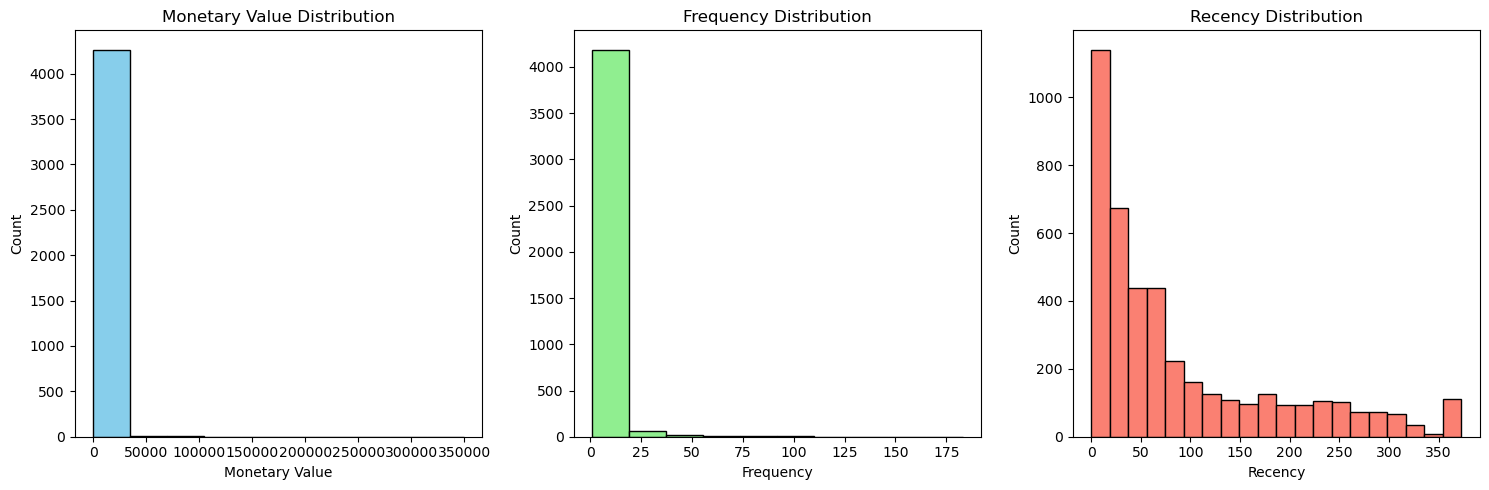

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(agg_df['monetary_value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(agg_df['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(agg_df['recency(days)'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### **Box Plots**

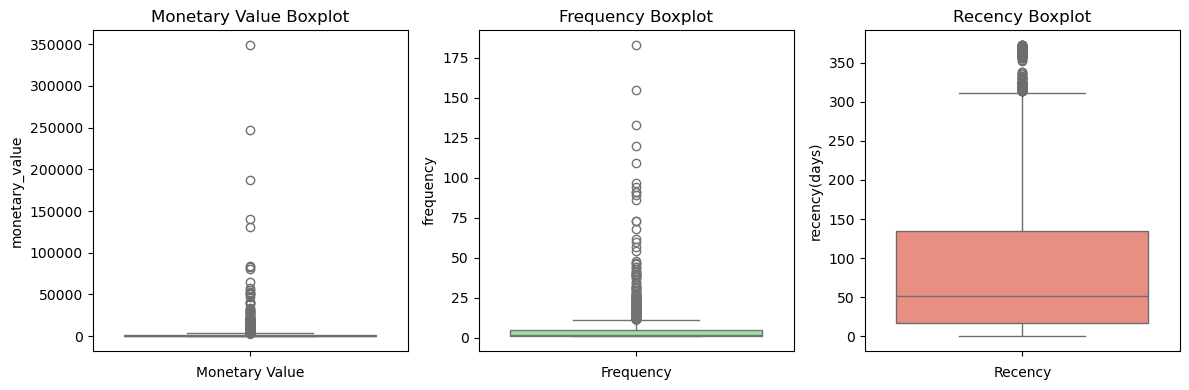

In [48]:
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=agg_df.monetary_value, color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=agg_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=agg_df['recency(days)'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

**A bit of interpretation of these 'Box Plots'. Box Plots basically tell us how much of the data is contained within the first and third quantile of the dataset.**
- First quantile (Q1)= 25 percentile of the data (*Lower limit of the box*)
- Third quantile (Q3) = 75 percentile of the data (*Upper limit of the box*)
- interquantile range (IQR) = Q3 - Q1
- Upper T : Q3 + 1.5 * IQR (*data above this point are considered outliers*)
- Lower T : Q1 - 1.5 * IQR (*data below this point are considered outliers*)

**Monetary value box plot is extremely thin. It means majority of the exchanges occur at at rather lower range of monetary value. It might be tempting to remove the outliers from our analysis, but we should remember that from a business standpoint, these outliers contribute huge sums of money. The frequency distribution also has a similar shape with similar distribution of outlier values, indicating the presence of a particular set of customers frequently visiting the retail store who might be the ones contributing the most money. If that is the case, these customers need to be well served, and in turn retained.**


In [49]:
mon_Q1 = agg_df.monetary_value.quantile(0.25)
mon_Q3 = agg_df.monetary_value.quantile(0.75)
mon_IQR = mon_Q3 - mon_Q1

# We will use the definition of outliers.

mon_outliers_df = agg_df[(agg_df.monetary_value > (mon_Q3 + mon_IQR * 1.5)) | (agg_df.monetary_value < (mon_Q1 - mon_IQR * 1.5))].copy()

In [50]:
mon_outliers_df.head()

,customer_id,monetary_value,frequency,last_invoice_date,recency(days)
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8


In [51]:
mon_outliers_df.describe().round(2)

,customer_id,monetary_value,frequency,last_invoice_date,recency(days)
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [52]:
frequency_Q1 = agg_df.frequency.quantile(0.25)
frequency_Q3 = agg_df.frequency.quantile(0.75)
frequency_IQR = frequency_Q3 - frequency_Q1

# We will use the definition of outliers.

frequency_outliers_df = agg_df[(agg_df.frequency > (frequency_Q3 + frequency_IQR * 1.5)) | (agg_df.frequency < (frequency_Q1 - frequency_IQR * 1.5))].copy()

In [53]:
frequency_outliers_df.describe().round(2)

,customer_id,monetary_value,frequency,last_invoice_date,recency(days)
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.40,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


Frequency outliers and monetary value outliers potentially have a great overleap. It is not shocking to assume that the customers vising the store the most number of times are also the ones (by extension) contributing the most revenue.

But first lets put our attention onto the non outlier data.

In [54]:
primary_df = agg_df[(~agg_df.index.isin(mon_outliers_df.index)) & ~agg_df.index.isin(frequency_outliers_df.index)]
primary_df.describe().round(2)

,customer_id,monetary_value,frequency,last_invoice_date,recency(days)
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


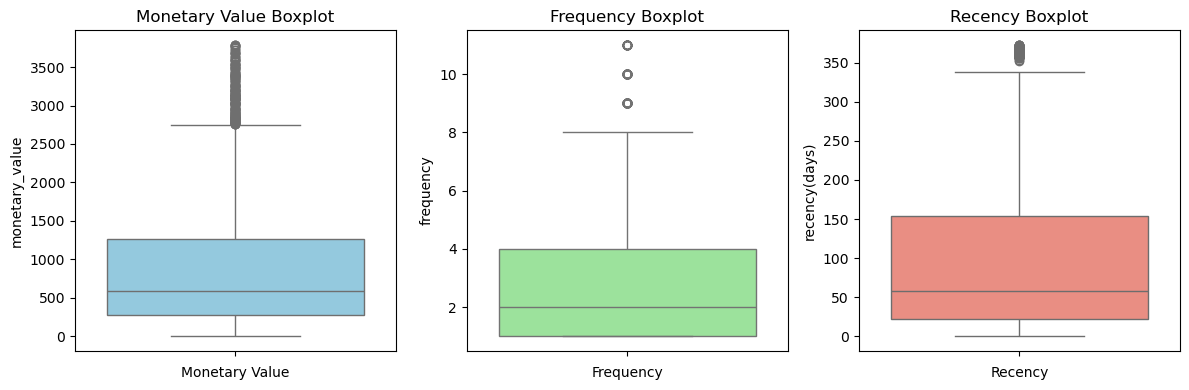

In [55]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=primary_df.monetary_value, color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=primary_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=primary_df['recency(days)'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Outliers will always be there, and so is the case here despite the trimming we just did before. But this is much more tolerable situation now. 

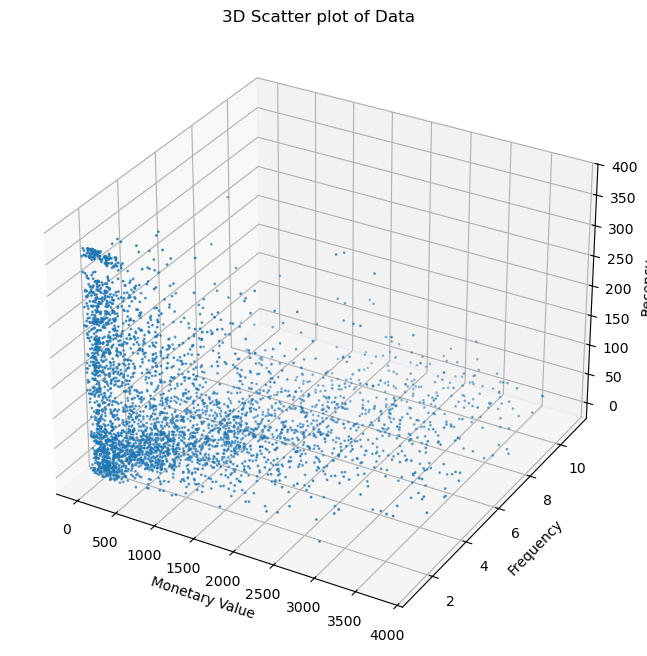

In [56]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection = '3d')

ax.scatter(primary_df.monetary_value, primary_df.frequency, primary_df["recency(days)"], s = 1)

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter plot of Data")

plt.show()

All three features are on different scales. Need to be rescaled., to prevent our algorithm to treat each feature with equal consideration

# Scaling data

### **Standard Scaling**  
(Standard Scaling is also known as **Z-score Normalization**)

Standard Scaling is a **data preprocessing technique** that **scales features** to have a **mean of 0** and a **standard deviation of 1**.

---

### **Formula:**
$$z = \frac{x - \mu}{\sigma}$$

Where:
- $x$: Original data value
- $\mu$ : Mean of the feature
- $\sigma$ : Standard deviation of the feature

Caveat:

- Assumes that each features follows a normal distribution, which may not always be true.
- In our case, features are not exactly, but roughly normally distrubted.

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_df = scaler.fit_transform(primary_df[["monetary_value", "frequency", "recency(days)"]])

scaled_data_df

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [58]:
scaled_data_df = pd.DataFrame(scaled_data_df, index=primary_df.index, columns = ("monetary_value", "frequency", "recency(days)"))

In [59]:
scaled_data_df.round(2).head()

,monetary_value,frequency,recency(days)
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


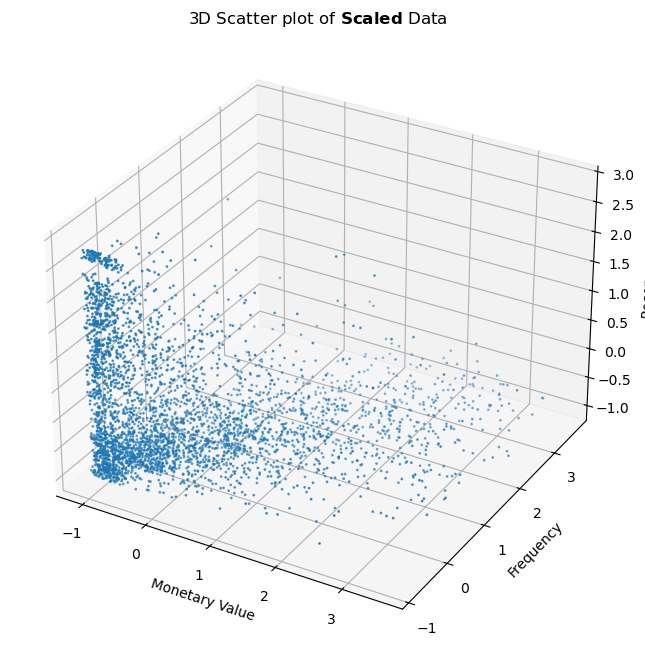

In [60]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection = '3d')

ax.scatter(scaled_data_df.monetary_value, scaled_data_df.frequency, scaled_data_df["recency(days)"], s = 1)

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title(r"3D Scatter plot of $\mathbf{Scaled}$ Data")

plt.show()

#### **Stage 3 : KMeans Clustering**
----
**K-Means Clustering Algorithm**  

The **K-Means Clustering** algorithm is an unsupervised machine learning technique used to partition a dataset into $k$ distinct clusters. It minimizes the variance within each cluster while maximizing the separation between clusters.

**How It Works:**  
1. **Initialization:**  
   - Choose the number of clusters $k$.  
   - Randomly initialize $k$ centroids.

2. **Assignment Step:**  
   - Assign each data point to the nearest centroid based on the Euclidean distance.

3. **Update Step:**  
   - Recalculate centroids as the mean of all points assigned to each cluster.

4. **Convergence:**  
   - Repeat the assignment and update steps until centroids stabilize or a maximum number of iterations is reached.

**Mathematical Objective:**  

The algorithm minimizes the **Within-Cluster Sum of Squares (WCSS)**, also called the inertia:

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

Where:  
- **$k$:** Number of clusters  
- **$x$:** Data point  
- **$C_i$:** Cluster $i$  
- **$\mu_i$:** Centroid of cluster $i$  

**Key Considerations:**  
- **Choosing $k$:** Use methods like the **Elbow Method** or **Silhouette Score** to determine the optimal number of clusters.  
- **Distance Metric:** Typically, Euclidean distance is used, but other metrics can be applied.  
- **Scalability:** K-Means works well with large datasets but can struggle with non-linear separability and varying cluster sizes.  

**Applications:**  
- Customer Segmentation  
- Market Basket Analysis  
- Image Compression  
- Anomaly Detection  
- Document Clustering  


### **Silhouette Score Formula**  

The **Silhouette Score** measures how well data points are clustered by comparing intra-cluster and inter-cluster distances. The formula is:

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Where:**  
- **$S(i)$:** Silhouette score for a data point $i$  
- **$a(i)$:** Average distance between $i$ and all other points in the same cluster (**Intra-cluster distance**)  
- **$b(i)$:** Average distance between $i$ and all points in the nearest neighboring cluster (**Inter-cluster distance**)  

**Interpretation:**  
- **$S(i) = 1$:** Perfect clustering (well-separated from other clusters).  
- **$S(i) = 0$:** On the boundary between two clusters.  
- **$S(i) < 0$:** Likely misclassified (closer to another cluster).  

The overall Silhouette Score for the model is the average of $S(i)$ across all points, indicating how well the clustering structure is defined.
```

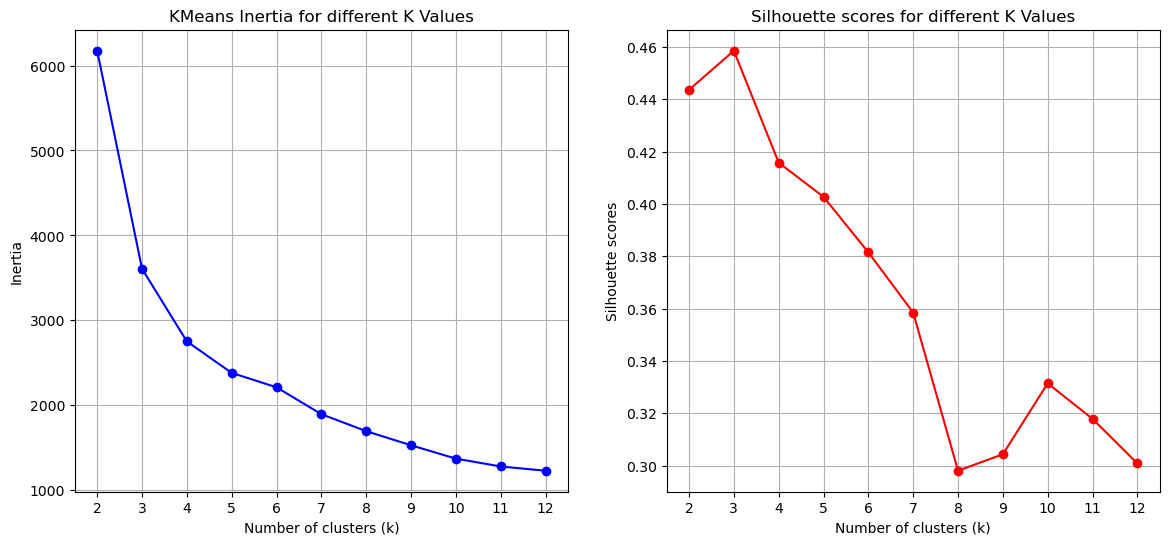

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_k = 12

intertia = [] # Average distance between cluster centers and data points
k_values = range(2, max_k+1) # Number of cluster (we try up and until 12 clusters)
silhouette_scores = [] # A Measure to tune the parameters

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    intertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, intertia, marker = 'o', color = 'blue')
plt.title("KMeans Inertia for different K Values")
plt.xlabel('Number of clusters (k)')
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'red')
plt.title("Silhouette scores for different K Values")
plt.xlabel('Number of clusters (k)')
plt.ylabel("Silhouette scores")
plt.xticks(k_values)
plt.grid(True)

plt.show()

#### So here, intertia drops off the most at about 4 and 5. But for Solhouette scores,k=4 has slightly higher silhouette score than k = 5. That means that having 4 clusters leads to less potential overlap between the clusters than having 5 clusters. Using less clusters is in general better, reduces the complexity of further analysis. 

In [62]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [63]:
primary_df["cluster"] = cluster_labels
           
primary_df

C:\Users\guill\AppData\Local\Temp\ipykernel_11672\1461396832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_df["cluster"] = cluster_labels


,customer_id,monetary_value,frequency,last_invoice_date,recency(days),cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


Here each customer, based on the monetary value, frequency and recency gets assigned a particular number, which identifies which cluster this customer belongs to.

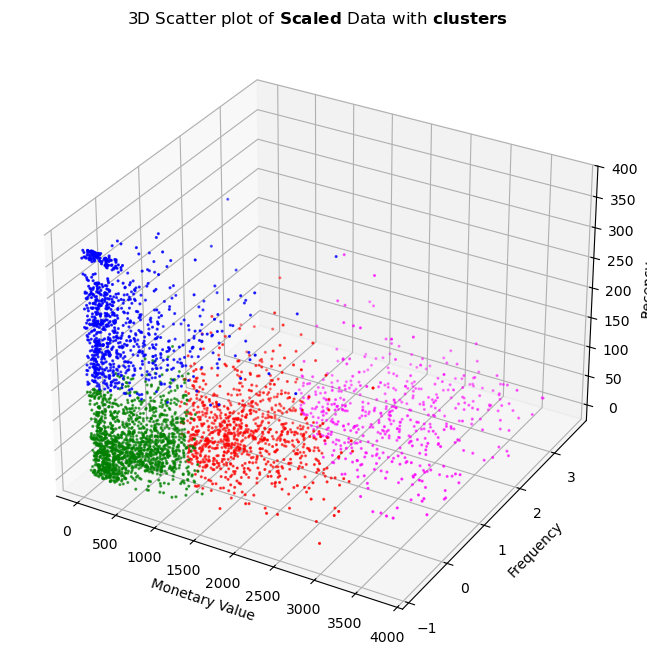

In [64]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection = '3d')

ax.scatter(primary_df.monetary_value,scaled_data_df.frequency, primary_df["recency(days)"], s=1.5, color=['red' if cluster == 0 else 'blue' if cluster == 1 else 'green' if cluster == 2 else 'magenta' for cluster in primary_df.cluster])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title(r"3D Scatter plot of $\mathbf{Scaled}$ Data with $\mathbf{clusters}$")

plt.show()

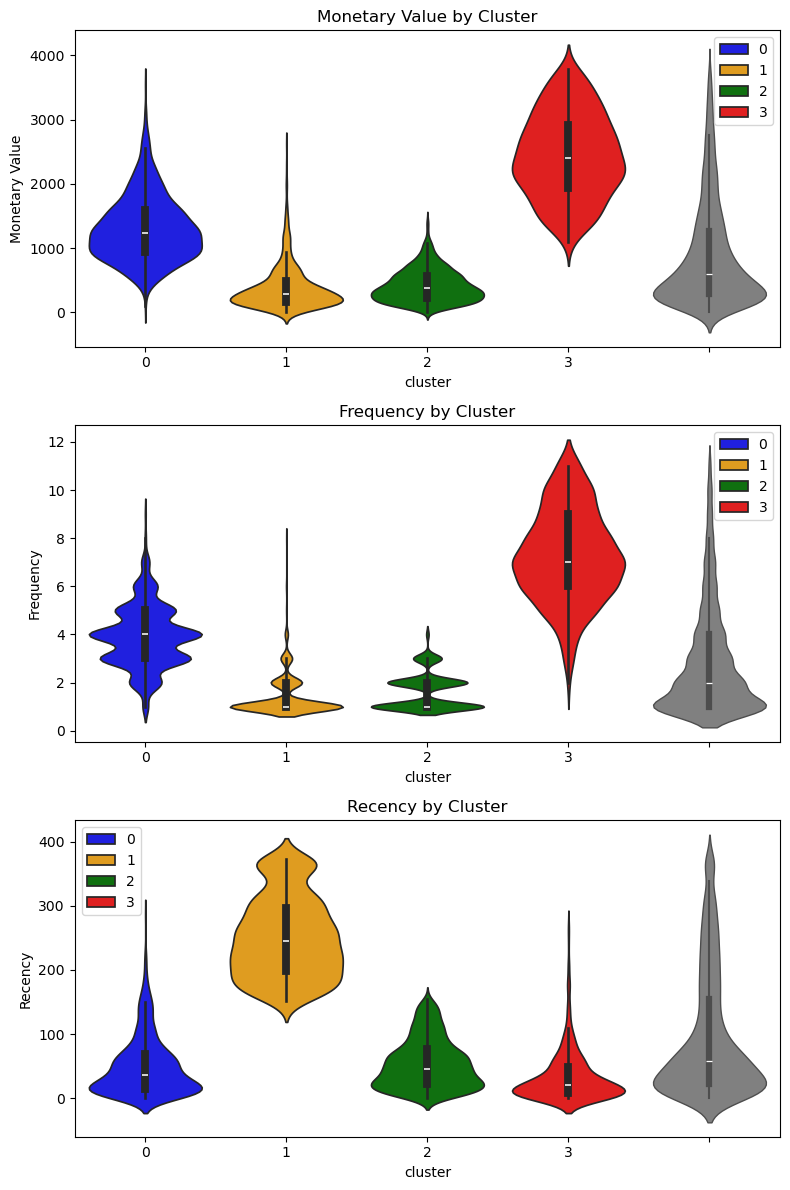

In [65]:
cluster_colors = {0: 'blue',
                  1: 'orange',
                  2: 'green',
                  3: 'red'} 

plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x=primary_df['cluster'], y=primary_df['monetary_value'], palette=cluster_colors, hue=primary_df["cluster"])
sns.violinplot(y=primary_df['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=primary_df['cluster'], y=primary_df['frequency'], palette=cluster_colors, hue=primary_df["cluster"])
sns.violinplot(y=primary_df['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=primary_df['cluster'], y=primary_df['recency(days)'], palette=cluster_colors, hue=primary_df["cluster"])
sns.violinplot(y=primary_df['recency(days)'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Customer Segmentation Strategy

#### **Cluster 0 (Blue): "Retain"**
- **Rationale:**  
  High-value customers who purchase regularly but not always very recently. Retention is crucial to maintain their loyalty and spending levels.
- **Action Plan:**  
  - Implement loyalty programs.  
  - Provide personalized offers and recommendations.  
  - Engage regularly through email campaigns and promotions.

#### **Cluster 1 (Orange): "Re-Engage"**
- **Rationale:**  
  Lower-value, infrequent buyers who haven’t purchased recently. Re-engaging them can reactivate their purchasing behavior.
- **Action Plan:**  
  - Launch targeted marketing campaigns.  
  - Offer special discounts and limited-time promotions.  
  - Send personalized reminders or product recommendations.

#### **Cluster 2 (Green): "Nurture"**
- **Rationale:**  
  Customers with recent purchases but low overall activity and value. They may be new or need nurturing to become loyal customers.
- **Action Plan:**  
  - Provide exceptional customer service.  
  - Offer onboarding incentives or exclusive first-time deals.  
  - Share personalized content and product recommendations.

#### **Cluster 3 (Red): "Reward"**
- **Rationale:**  
  High-value, very frequent buyers who are still actively purchasing. Recognizing and rewarding their loyalty ensures long-term engagement.
- **Action Plan:**  
  - Develop a robust loyalty rewards program.  
  - Provide exclusive offers, early access, or premium benefits.  
  - Publicly acknowledge their loyalty through customer spotlights or rewards.


# Outlier Analysis

Now, **monetary_value** and **frequency** could potentially have an overlap, which we will also deal with apart from the two separate outlier catgories themselves. This would include the erasure or removal of the parts that fall in the *overlapping regions*. Imagining it in terms of Venn Diagrams might prove quite helpful.

In [66]:
overlap_indices = mon_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

pure_mon_outliers_df = mon_outliers_df.drop(overlap_indices)
pure_frequency_outliers_df = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = mon_outliers_df.loc[overlap_indices]

In [67]:
pure_mon_outliers_df["cluster"] = -1
pure_frequency_outliers_df["cluster"] = -2
monetary_and_frequency_outliers["cluster"] = -3

In [68]:
outlier_clusters_df = pd.concat([pure_mon_outliers_df, pure_frequency_outliers_df, monetary_and_frequency_outliers])
outlier_clusters_df

,customer_id,monetary_value,frequency,last_invoice_date,recency(days),cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


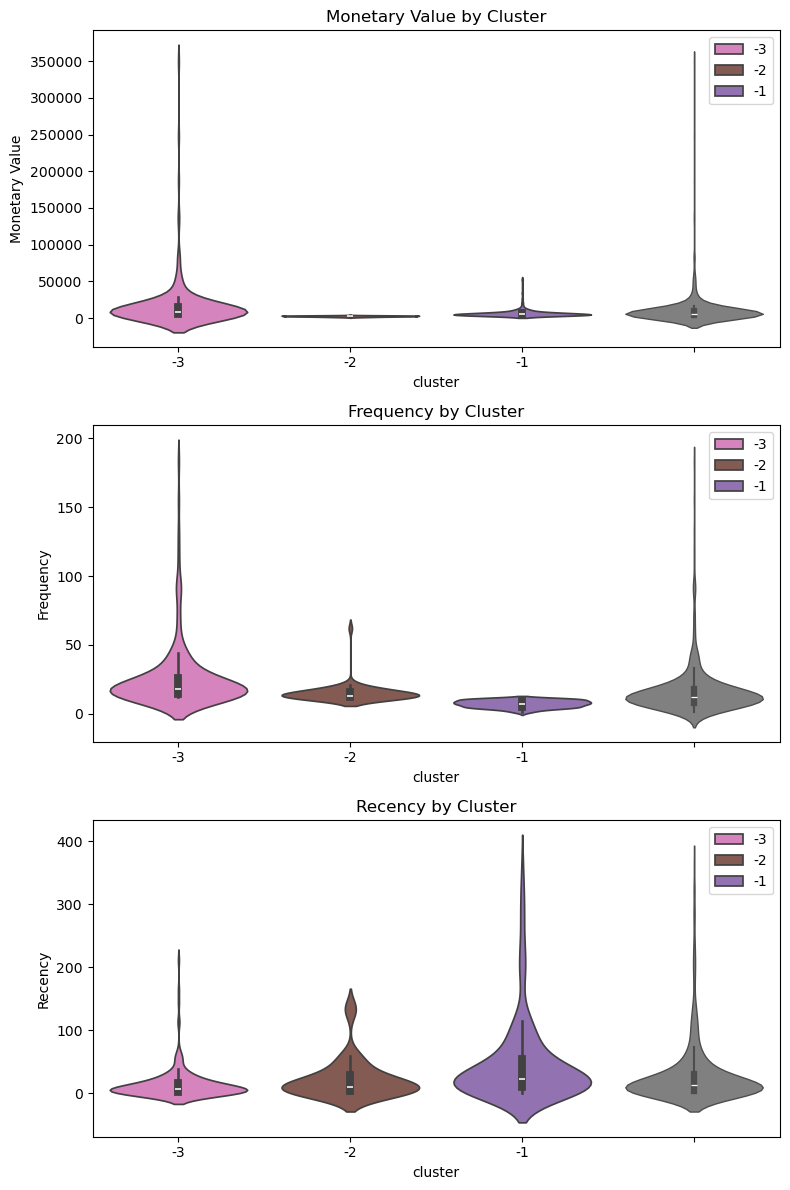

In [69]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(8,12))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['cluster'], y=outlier_clusters_df['monetary_value'], palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['cluster'], y=outlier_clusters_df['frequency'], palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['cluster'], y=outlier_clusters_df['recency(days)'], palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df['recency(days)'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


### Outlier Customer Segmentation Strategy  

#### **Cluster -1 (Monetary Outliers): "MAINTAIN"**  
- **Characteristics:**  
  These customers make large but infrequent purchases, indicating a high spending capacity with limited engagement frequency. They value premium products or services.  
- **Potential Strategy:**  
  - Offer personalized luxury experiences tailored to their preferences.  
  - Provide exclusive early access to premium products or services.  
  - Use targeted promotions highlighting premium offerings to stimulate additional purchases.

#### **Cluster -2 (Frequency Outliers): "UPSELL"**  
- **Characteristics:**  
  These are frequent buyers who spend relatively less per transaction, suggesting a strong purchasing habit but limited average order value. They are responsive to regular offers but may need more incentives to increase their spending.  
- **Potential Strategy:**  
  - Introduce bundle deals or product upgrade options to maximize basket size.  
  - Implement a tiered loyalty program that rewards higher spending with premium benefits.  
  - Offer personalized recommendations based on past purchases to encourage higher-value transactions.

#### **Cluster -3 (Monetary & Frequency Outliers): "IMPRESS"**  
- **Characteristics:**  
  The most valuable customers, combining high spending with frequent purchases. They are likely brand advocates who expect top-tier service and exclusivity.  
- **Potential Strategy:**  
  - Develop a VIP loyalty program with exclusive perks, personalized gifts, and premium support.  
  - Offer invitations to special events or first access to new products.  
  - Engage them through tailored experiences, premium services, and frequent recognition to strengthen brand loyalty.


In [70]:
cluster_labels = {
    0: "MAINTAIN",      
    1: "RECONNECT",     
    2: "NURTURE",        
    3: "APPRECIATE",   
    -1: "INDULGE",     
    -2: "UPSELL",     
    -3: "IMPRESS"      
}

In [71]:
full_clustering_df = pd.concat([primary_df, outlier_clusters_df])

full_clustering_df

,customer_id,monetary_value,frequency,last_invoice_date,recency(days),cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [72]:
full_clustering_df["ClusterLabel"] = full_clustering_df["cluster"].map(cluster_labels)

full_clustering_df

,customer_id,monetary_value,frequency,last_invoice_date,recency(days),cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RECONNECT
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,MAINTAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,MAINTAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,IMPRESS
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,IMPRESS
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,IMPRESS
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,IMPRESS


# Visualisation

In [73]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["monetary_value"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['recency(days)', 'frequency', 'MonetaryValue per 100 pounds']].mean()

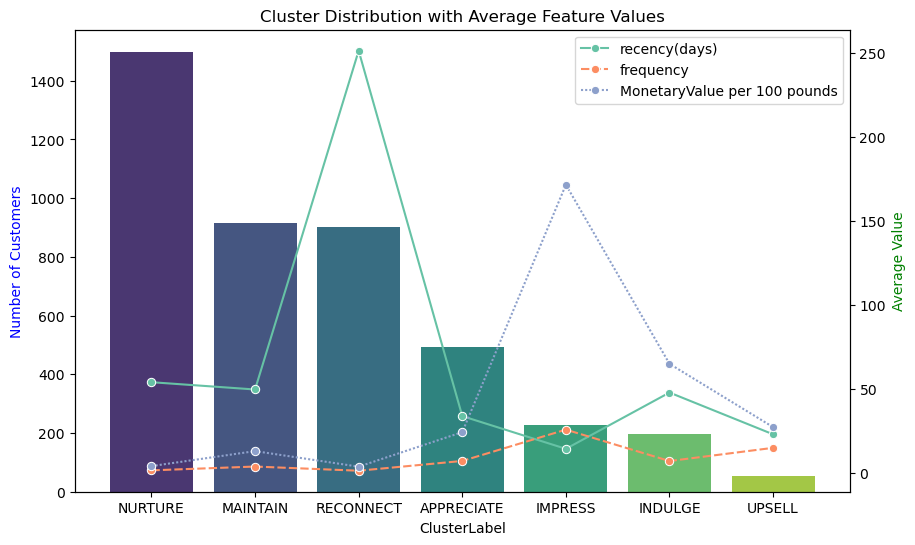

In [74]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()